In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df1 = pd.read_csv("rama_2023.csv",parse_dates = True, index_col=0)
df1 = df1.drop('NOX',axis=1)

In [3]:
df2 = pd.read_csv("redmet_2023.csv",parse_dates = True, index_col=0)

* Temperatura (TMP)
* Humedad relativa (RH)
* Dirección del viento (WDR) 
* Velocidad del viento (WSP)

In [4]:
df2

,RH,TMP,WDR,WSP
fecha,,,,
2015-01-01,60.565476,13.385714,156.723039,1.933333
2015-01-02,52.452381,13.567262,176.710784,2.559804
2015-01-03,55.763636,13.893333,190.830846,2.136318
2015-01-04,62.776786,12.536012,196.306373,2.592647
2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...
2023-05-27,51.899130,19.453565,190.198664,2.187646
2023-05-28,59.949565,17.375826,183.542571,2.092154
2023-05-29,58.837742,17.039153,169.527919,1.952284


In [5]:
df = pd.concat([df1,df2],axis=1)

In [6]:
df

,CO,NO,NO2,O3,PM10,PM25,SO2,RH,TMP,WDR,WSP
fecha,,,,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,23.175150,105.573684,78.953405,11.554723,60.565476,13.385714,156.723039,1.933333
2015-01-02,0.807585,32.249608,21.554160,17.268366,36.687845,15.449438,1.895052,52.452381,13.567262,176.710784,2.559804
2015-01-03,0.640755,21.686916,19.394081,15.486486,29.269022,12.915129,1.436937,55.763636,13.893333,190.830846,2.136318
2015-01-04,0.726940,24.606272,19.560976,17.329032,39.961538,16.838284,1.809061,62.776786,12.536012,196.306373,2.592647
2015-01-05,0.530815,11.443182,20.990260,14.470588,31.855643,12.667774,8.315789,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,41.580645,36.774011,21.170139,2.735683,51.899130,19.453565,190.198664,2.187646
2023-05-28,0.286826,3.458886,16.349241,36.913761,28.580000,18.454861,2.331658,59.949565,17.375826,183.542571,2.092154
2023-05-29,0.482077,11.448113,24.521154,29.697068,30.241486,16.692857,1.071588,58.837742,17.039153,169.527919,1.952284


In [7]:
df2015 = df.loc['2015-01-01':'2015-12-31']
corr15 = pg.pairwise_corr(df2015, method='spearman')
c15 = corr15.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c15 = c15[(c15['r']>0.5) | (c15['r']< -0.5)]
c15['contpp'] = c15['X'] + c15['Y']
c15.index = c15['contpp']
c15 = c15.drop(['X','Y','contpp'],axis=1)

df2016 = df.loc['2016-01-01':'2016-12-31']
corr16 = pg.pairwise_corr(df2016, method='spearman')
c16 = corr16.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c16 = c16[(c16['r']>0.5) | (c16['r']< -0.5)]
c16['contpp'] = c16['X'] + c16['Y']
c16.index = c16['contpp']
c16 = c16.drop(['X','Y','contpp'],axis=1)

df2017 = df.loc['2017-01-01':'2017-12-31']
corr17 = pg.pairwise_corr(df2017, method='spearman')
c17=corr17.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c17 = c17[(c17['r']>0.5) | (c17['r']< -0.5)]
c17['contpp'] = c17['X'] + c17['Y']
c17.index = c17['contpp']
c17 = c17.drop(['X','Y','contpp'],axis=1)

df2018 = df.loc['2018-01-01':'2018-12-31']
corr18 = pg.pairwise_corr(df2018, method='spearman')
c18 = corr18.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c18 = c18[(c18['r']>0.5) | (c18['r']< -0.5)]
c18['contpp'] = c18['X'] + c18['Y']
c18.index = c18['contpp']
c18 = c18.drop(['X','Y','contpp'],axis=1)

df2019 = df.loc['2019-01-01':'2019-12-31']
corr19 = pg.pairwise_corr(df2019, method='spearman')
c19 = corr19.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c19 = c19[(c19['r']>0.5) | (c19['r']< -0.5)]
c19['contpp'] = c19['X'] + c19['Y']
c19.index = c19['contpp']
c19 = c19.drop(['X','Y','contpp'],axis=1)

df2020 = df.loc['2020-01-01':'2020-12-31']
corr20 = pg.pairwise_corr(df2020, method='spearman')
c20 = corr20.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c20 = c20[(c20['r']>0.5) | (c20['r']< -0.5)]
c20['contpp'] = c20['X'] + c20['Y']
c20.index = c20['contpp']
c20 = c20.drop(['X','Y','contpp'],axis=1)

df2021 = df.loc['2021-01-01':'2021-12-31']
corr21 = pg.pairwise_corr(df2021, method='spearman')
c21 = corr21.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c21 = c21[(c21['r']>0.5) | (c21['r']< -0.5)]
c21['contpp'] = c21['X'] + c21['Y']
c21.index = c21['contpp']
c21 = c21.drop(['X','Y','contpp'],axis=1)

df2022 = df.loc['2022-01-01':'2022-12-31']
corr22 = pg.pairwise_corr(df2022, method='spearman')
c22 = corr22.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c22 = c22[(c22['r']>0.5) | (c22['r']< -0.5)]
c22['contpp'] = c22['X'] + c22['Y']
c22.index = c22['contpp']
c22 = c22.drop(['X','Y','contpp'],axis=1)

In [8]:
cr = pd.concat([c15,c16,c17,c18,c19,c20,c21,c22],axis=1)

In [9]:
cr.columns = ['2015','2016','2017','2018','2019','2020','2021','2022']

In [10]:
cr = cr.T

In [11]:
cr

contpp,CONO2,CONO,PM10PM25,NO2PM25,NONO2,NO2PM10,COPM25,COPM10,PM10SO2,O3TMP,...,PM25WSP,COWSP,NO2WSP,NO2SO2,PM10RH,O3PM25,O3RH,O3PM10,NOWSP,PM25RH
2015,0.895527,0.860206,0.829616,0.764348,0.691475,0.683533,0.640188,0.623085,0.621328,0.620147,...,-0.553622,-0.685444,-0.734091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,0.912865,0.827874,0.885521,0.784970,0.714037,0.794787,0.702313,0.740364,0.643637,0.525324,...,NaN,-0.563272,-0.579301,0.523566,-0.642948,NaN,NaN,NaN,NaN,NaN
2017,0.937446,0.818183,0.872484,0.756618,0.843111,0.786783,0.779766,0.793890,0.502270,NaN,...,NaN,-0.562706,-0.624874,NaN,-0.726043,0.544524,NaN,NaN,NaN,NaN
2018,0.903487,0.871821,0.862248,0.742084,0.791430,0.729137,0.659243,0.623850,0.572434,0.566687,...,NaN,-0.617546,-0.560999,NaN,-0.668574,NaN,-0.597811,NaN,NaN,NaN
2019,0.870200,0.865594,0.888527,0.647335,0.734598,0.673051,NaN,0.558555,NaN,0.626243,...,NaN,-0.578727,-0.583736,NaN,-0.701335,NaN,NaN,NaN,NaN,NaN
2020,0.899935,0.842320,0.844242,0.516606,0.845325,0.647123,NaN,0.571985,0.548817,0.605974,...,NaN,-0.620758,-0.583860,0.549134,-0.650357,0.519418,NaN,NaN,NaN,NaN
2021,0.873391,0.843404,0.895745,0.630509,0.785366,0.645877,0.512779,0.504046,0.611600,0.567238,...,NaN,-0.689216,-0.628677,NaN,-0.816510,0.640220,-0.517277,0.539238,-0.502901,-0.613008
2022,0.930879,0.845609,0.848078,0.740698,0.782511,0.725745,0.674479,0.633645,0.551948,0.644335,...,NaN,-0.716877,-0.657413,NaN,-0.676400,NaN,-0.531699,NaN,-0.509080,NaN


In [12]:
cr.describe()

contpp,CONO2,CONO,PM10PM25,NO2PM25,NONO2,NO2PM10,COPM25,COPM10,PM10SO2,O3TMP,...,PM25WSP,COWSP,NO2WSP,NO2SO2,PM10RH,O3PM25,O3RH,O3PM10,NOWSP,PM25RH
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,8.000000,7.000000,7.000000,...,1.000000,8.000000,8.000000,2.000000,7.000000,3.000000,3.000000,1.000000,2.000000,1.000000
mean,0.902966,0.846876,0.865807,0.697896,0.773482,0.710754,0.661461,0.631177,0.578862,0.593707,...,-0.553622,-0.629318,-0.619119,0.536350,-0.697452,0.568054,-0.548929,0.539238,-0.505991,-0.613008
std,0.024140,0.018397,0.023747,0.091958,0.056474,0.058340,0.087633,0.095216,0.049338,0.041989,...,NaN,0.060916,0.056402,0.018080,0.059824,0.063746,0.042943,NaN,0.004369,NaN
min,0.870200,0.818183,0.829616,0.516606,0.691475,0.645877,0.512779,0.504046,0.502270,0.525324,...,-0.553622,-0.716877,-0.734091,0.523566,-0.816510,0.519418,-0.597811,0.539238,-0.509080,-0.613008
25%,0.889993,0.838709,0.847119,0.643129,0.729458,0.666569,0.644952,0.568627,0.550383,0.566963,...,-0.553622,-0.686387,-0.635861,0.529958,-0.713689,0.531971,-0.564755,0.539238,-0.507535,-0.613008
50%,0.901711,0.844507,0.867366,0.741391,0.783939,0.704639,0.666861,0.623468,0.572434,0.605974,...,-0.553622,-0.619152,-0.604367,0.536350,-0.676400,0.544524,-0.531699,0.539238,-0.505991,-0.613008
75%,0.917368,0.861553,0.886272,0.758551,0.804350,0.743548,0.695354,0.660324,0.616464,0.623195,...,-0.553622,-0.574863,-0.582627,0.542742,-0.659465,0.592372,-0.524488,0.539238,-0.504446,-0.613008
max,0.937446,0.871821,0.895745,0.784970,0.845325,0.794787,0.779766,0.793890,0.643637,0.644335,...,-0.553622,-0.562706,-0.560999,0.549134,-0.642948,0.640220,-0.517277,0.539238,-0.502901,-0.613008


In [13]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2015 to 2022
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONO2     8 non-null      float64
 1   CONO      8 non-null      float64
 2   PM10PM25  8 non-null      float64
 3   NO2PM25   8 non-null      float64
 4   NONO2     8 non-null      float64
 5   NO2PM10   8 non-null      float64
 6   COPM25    6 non-null      float64
 7   COPM10    8 non-null      float64
 8   PM10SO2   7 non-null      float64
 9   O3TMP     7 non-null      float64
 10  NOPM10    5 non-null      float64
 11  PM25SO2   6 non-null      float64
 12  PM25WSP   1 non-null      float64
 13  COWSP     8 non-null      float64
 14  NO2WSP    8 non-null      float64
 15  NO2SO2    2 non-null      float64
 16  PM10RH    7 non-null      float64
 17  O3PM25    3 non-null      float64
 18  O3RH      3 non-null      float64
 19  O3PM10    1 non-null      float64
 20  NOWSP     2 non-null      float64
 

In [14]:
cr = cr[['O3TMP','COWSP','NO2WSP','PM10RH']]

In [15]:
cr

contpp,O3TMP,COWSP,NO2WSP,PM10RH
2015,0.620147,-0.685444,-0.734091,NaN
2016,0.525324,-0.563272,-0.579301,-0.642948
2017,NaN,-0.562706,-0.624874,-0.726043
2018,0.566687,-0.617546,-0.560999,-0.668574
2019,0.626243,-0.578727,-0.583736,-0.701335
2020,0.605974,-0.620758,-0.583860,-0.650357
2021,0.567238,-0.689216,-0.628677,-0.816510
2022,0.644335,-0.716877,-0.657413,-0.676400


In [16]:
cr['O3TMP'] # Ozono (O3) vs Temperatura (TMP) 

2015    0.620147
2016    0.525324
2017         NaN
2018    0.566687
2019    0.626243
2020    0.605974
2021    0.567238
2022    0.644335
Name: O3TMP, dtype: float64

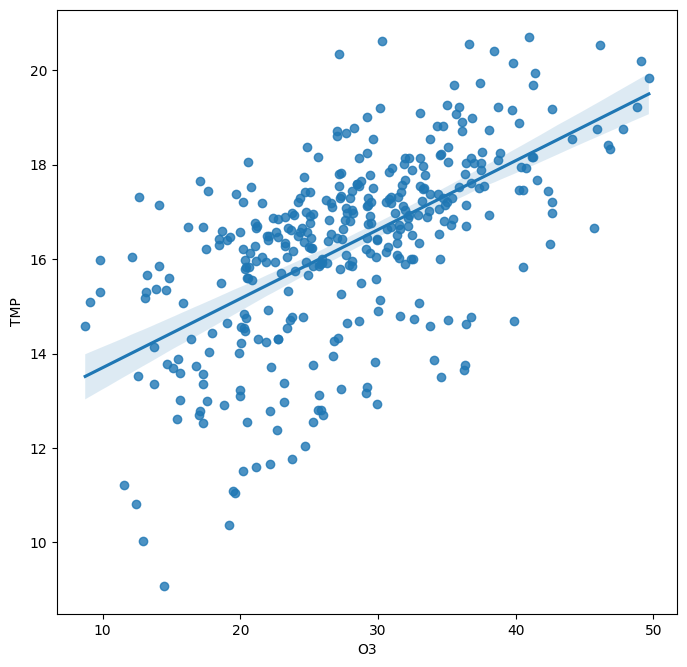

In [17]:
plt.figure(figsize=(8,8), dpi=100)
ax = sns.regplot(x='O3', y='TMP', data = df.loc['2015-01-01':'2015-12-31'])

In [18]:

A=[]
for i in range(1, 5):
    T = df['2015-'+ str(3*i-2):'2015-'+ str(3*i)]
    corr = pg.pairwise_corr(T, method='spearman')
    c = corr.sort_values(by = 'r', ascending = False)[['X','Y','r']]
    c = c[(c['r']>0.5) | (c['r']< -0.5)]
    c['contpp'] = c['X'] + c['Y']
    c.index = c['contpp']
    c = c.drop(['X','Y','contpp'],axis=1)
    A.append(c)

Q = pd.concat([A[0],A[1],A[2],A[3]],axis=1)
Q.columns = ['2015Q1','2015Q2','2015Q3','2015Q4']
Q = Q.T

In [19]:
Q

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM25,O3PM10,...,CORH,NO2RH,NOPM25,NOWSP,NOPM10,NO2SO2,NOWDR,COWDR,SO2WSP,PM10WSP
2015Q1,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.611623,0.604066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q2,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q3,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,...,0.604349,0.558914,0.515466,-0.509964,NaN,NaN,NaN,NaN,NaN,NaN
2015Q4,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,...,NaN,NaN,0.544272,-0.623152,0.668573,0.63969,-0.53273,-0.555833,-0.584961,-0.674953


In [20]:
trim=[]

for a in range(0,8):
    A=[]
    for i in range(1, 5):
        T = df[str(2015+a)+'-'+ str(3*i-2): str(2015+a)+'-'+ str(3*i)]
        corr = pg.pairwise_corr(T, method='spearman')
        c = corr.sort_values(by = 'r', ascending = False)[['X','Y','r']]
        c = c[(c['r']>0.5) | (c['r']< -0.5)]
        c['contpp'] = c['X'] + c['Y']
        c.index = c['contpp']
        c = c.drop(['X','Y','contpp'],axis=1)
        A.append(c)
        
    Q = pd.concat([A[0],A[1],A[2],A[3]],axis=1)
    Q.columns = [str(2015+a)+'Q1',str(2015+a)+'Q2',str(2015+a)+'Q3',str(2015+a)+'Q4']
    Q = Q.T
    trim.append(Q)

    
cor_trim = pd.concat([trim[0],trim[1],trim[2],trim[3],trim[4],trim[5],trim[6],trim[7]],axis=0)

In [22]:
cor_trim

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM25,O3PM10,...,COSO2,WDRWSP,SO2RH,NORH,SO2TMP,COO3,PM25TMP,PM25RH,TMPWDR,NO2WDR
2015Q1,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.611623,0.604066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q2,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q3,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q4,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q1,0.903997,0.816786,0.822551,0.803456,0.848877,0.634337,0.599156,0.744529,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q2,0.846106,0.887402,0.618761,0.765584,0.571875,0.680491,0.646488,0.506100,0.628157,0.595111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q3,0.913706,0.920642,0.521785,0.832776,NaN,NaN,NaN,0.734322,0.621673,0.591264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q4,0.856896,0.905692,0.812802,0.884207,0.825347,0.802075,0.762172,0.551932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017Q1,0.742816,0.943038,0.604033,0.829823,0.741268,0.707223,0.554908,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017Q2,0.924877,0.921229,0.744848,0.761077,0.682943,0.748256,0.812661,NaN,0.605033,0.540229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
corr23_Q1 = pg.pairwise_corr(df['2023-01':'2023-03'], method='spearman')
c23_Q1 = corr23_Q1.sort_values(by = 'r', ascending = False)[['X','Y','r']]
c23_Q1 = c23_Q1[(c23_Q1['r']>0.5) | (c23_Q1['r']< -0.5)]
c23_Q1['contpp'] = c23_Q1['X'] + c23_Q1['Y']
c23_Q1.index = c23_Q1['contpp']
c23_Q1 = c23_Q1.drop(['X','Y','contpp'],axis=1)

c23_Q1.columns = ['2023Q1']

c23_Q1=c23_Q1.T

In [24]:
c23_Q1

contpp,CONO2,CONO,NONO2,PM10PM25,COPM10,NO2PM25,NO2PM10,COPM25,PM25WSP,RHTMP,COWSP,NO2WSP
2023Q1,0.840952,0.798741,0.719093,0.707552,0.659053,0.639725,0.613911,0.575174,-0.56003,-0.652945,-0.673172,-0.705843


In [25]:
cor_trim = pd.concat([cor_trim,c23_Q1],axis=0)

In [26]:
cor_trim

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM25,O3PM10,...,COSO2,WDRWSP,SO2RH,NORH,SO2TMP,COO3,PM25TMP,PM25RH,TMPWDR,NO2WDR
2015Q1,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.611623,0.604066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q2,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q3,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015Q4,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q1,0.903997,0.816786,0.822551,0.803456,0.848877,0.634337,0.599156,0.744529,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q2,0.846106,0.887402,0.618761,0.765584,0.571875,0.680491,0.646488,0.506100,0.628157,0.595111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q3,0.913706,0.920642,0.521785,0.832776,NaN,NaN,NaN,0.734322,0.621673,0.591264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016Q4,0.856896,0.905692,0.812802,0.884207,0.825347,0.802075,0.762172,0.551932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017Q1,0.742816,0.943038,0.604033,0.829823,0.741268,0.707223,0.554908,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017Q2,0.924877,0.921229,0.744848,0.761077,0.682943,0.748256,0.812661,NaN,0.605033,0.540229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
index=pd.date_range('2015-01-01', '2023-03-31', freq='Q-DEC')

In [28]:
cor_trim.index=index

In [29]:
cor_trim

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM25,O3PM10,...,COSO2,WDRWSP,SO2RH,NORH,SO2TMP,COO3,PM25TMP,PM25RH,TMPWDR,NO2WDR
2015-03-31,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.611623,0.604066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31,0.903997,0.816786,0.822551,0.803456,0.848877,0.634337,0.599156,0.744529,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,0.846106,0.887402,0.618761,0.765584,0.571875,0.680491,0.646488,0.506100,0.628157,0.595111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,0.913706,0.920642,0.521785,0.832776,NaN,NaN,NaN,0.734322,0.621673,0.591264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.856896,0.905692,0.812802,0.884207,0.825347,0.802075,0.762172,0.551932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,0.742816,0.943038,0.604033,0.829823,0.741268,0.707223,0.554908,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,0.924877,0.921229,0.744848,0.761077,0.682943,0.748256,0.812661,NaN,0.605033,0.540229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cor_trim.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2015-03-31 to 2023-03-31
Freq: Q-DEC
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM10PM25  33 non-null     float64
 1   CONO2     33 non-null     float64
 2   NO2PM25   30 non-null     float64
 3   CONO      33 non-null     float64
 4   NO2PM10   22 non-null     float64
 5   COPM10    21 non-null     float64
 6   COPM25    25 non-null     float64
 7   PM10SO2   18 non-null     float64
 8   O3PM25    15 non-null     float64
 9   O3PM10    17 non-null     float64
 10  PM25SO2   17 non-null     float64
 11  O3TMP     17 non-null     float64
 12  NONO2     33 non-null     float64
 13  NO2O3     2 non-null      float64
 14  O3WSP     3 non-null      float64
 15  O3RH      17 non-null     float64
 16  COWSP     28 non-null     float64
 17  PM25WSP   17 non-null     float64
 18  NO2WSP    27 non-null     float64
 19  TMPWSP    2 non-null      float64
 20  PM

In [31]:
cor_trim=cor_trim.drop(cor_trim.loc[:,'CORH':'NO2WDR'],axis=1)

In [32]:
cor_trim.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2015-03-31 to 2023-03-31
Freq: Q-DEC
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM10PM25  33 non-null     float64
 1   CONO2     33 non-null     float64
 2   NO2PM25   30 non-null     float64
 3   CONO      33 non-null     float64
 4   NO2PM10   22 non-null     float64
 5   COPM10    21 non-null     float64
 6   COPM25    25 non-null     float64
 7   PM10SO2   18 non-null     float64
 8   O3PM25    15 non-null     float64
 9   O3PM10    17 non-null     float64
 10  PM25SO2   17 non-null     float64
 11  O3TMP     17 non-null     float64
 12  NONO2     33 non-null     float64
 13  NO2O3     2 non-null      float64
 14  O3WSP     3 non-null      float64
 15  O3RH      17 non-null     float64
 16  COWSP     28 non-null     float64
 17  PM25WSP   17 non-null     float64
 18  NO2WSP    27 non-null     float64
 19  TMPWSP    2 non-null      float64
 20  PM

In [33]:
cor_trim = cor_trim.drop(['NO2O3','O3WSP','TMPWSP','RHWSP'],axis=1)

In [34]:
cor_trim

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM25,O3PM10,PM25SO2,O3TMP,NONO2,O3RH,COWSP,PM25WSP,NO2WSP,PM10RH,RHTMP
2015-03-31,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.611623,0.604066,0.579537,0.553344,0.538396,-0.523003,-0.675236,-0.710582,-0.767461,NaN,NaN
2015-06-30,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,NaN,0.583628,0.651521,-0.738621,NaN,NaN,NaN,-0.539688,-0.841758
2015-09-30,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,NaN,0.667263,0.730530,-0.547123,-0.841191,-0.541082,-0.800826,NaN,-0.761448
2015-12-31,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,0.786292,NaN,0.760184,-0.615708,-0.795771,-0.705100,-0.825964,NaN,NaN
2016-03-31,0.903997,0.816786,0.822551,0.803456,0.848877,0.634337,0.599156,0.744529,NaN,NaN,0.810878,NaN,0.576525,NaN,-0.668657,-0.644625,-0.714111,NaN,NaN
2016-06-30,0.846106,0.887402,0.618761,0.765584,0.571875,0.680491,0.646488,0.506100,0.628157,0.595111,NaN,0.592531,0.630260,NaN,NaN,NaN,NaN,-0.661793,-0.825402
2016-09-30,0.913706,0.920642,0.521785,0.832776,NaN,NaN,NaN,0.734322,0.621673,0.591264,0.784135,NaN,0.746652,-0.582495,-0.821602,NaN,-0.775519,-0.513339,-0.685357
2016-12-31,0.856896,0.905692,0.812802,0.884207,0.825347,0.802075,0.762172,0.551932,NaN,NaN,0.673674,NaN,0.791671,NaN,-0.773423,-0.758904,-0.779881,-0.502582,NaN
2017-03-31,0.742816,0.943038,0.604033,0.829823,0.741268,0.707223,0.554908,NaN,NaN,NaN,0.628333,NaN,0.799564,NaN,-0.664452,-0.578121,-0.652599,NaN,-0.610061
2017-06-30,0.924877,0.921229,0.744848,0.761077,0.682943,0.748256,0.812661,NaN,0.605033,0.540229,NaN,NaN,0.723013,NaN,NaN,NaN,NaN,-0.612438,-0.555917


In [35]:
cor_trim.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2015-03-31 to 2023-03-31
Freq: Q-DEC
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM10PM25  33 non-null     float64
 1   CONO2     33 non-null     float64
 2   NO2PM25   30 non-null     float64
 3   CONO      33 non-null     float64
 4   NO2PM10   22 non-null     float64
 5   COPM10    21 non-null     float64
 6   COPM25    25 non-null     float64
 7   PM10SO2   18 non-null     float64
 8   O3PM25    15 non-null     float64
 9   O3PM10    17 non-null     float64
 10  PM25SO2   17 non-null     float64
 11  O3TMP     17 non-null     float64
 12  NONO2     33 non-null     float64
 13  O3RH      17 non-null     float64
 14  COWSP     28 non-null     float64
 15  PM25WSP   17 non-null     float64
 16  NO2WSP    27 non-null     float64
 17  PM10RH    17 non-null     float64
 18  RHTMP     21 non-null     float64
dtypes: float64(19)
memory usage: 5.2 KB


In [36]:
contam = cor_trim[['PM10PM25','CONO2','NO2PM25','CONO','NO2PM10','COPM10','COPM25','PM10SO2','O3PM10',
                  'O3PM10','PM25SO2','NONO2',]]

In [42]:
contam

contpp,PM10PM25,CONO2,NO2PM25,CONO,NO2PM10,COPM10,COPM25,PM10SO2,O3PM10,O3PM10,PM25SO2,NONO2
2015-03-31,0.865317,0.849282,0.829888,0.788451,0.780763,0.736823,0.736330,0.618932,0.604066,0.604066,0.579537,0.538396
2015-06-30,0.808202,0.858943,0.581733,0.780315,NaN,NaN,NaN,0.500398,NaN,NaN,NaN,0.651521
2015-09-30,0.767443,0.936177,0.691059,0.814327,NaN,NaN,0.611655,0.519057,NaN,NaN,NaN,0.730530
2015-12-31,0.925265,0.903904,0.857698,0.898093,0.885563,0.803816,0.744910,0.695899,NaN,NaN,0.786292,0.760184
2016-03-31,0.903997,0.816786,0.822551,0.803456,0.848877,0.634337,0.599156,0.744529,NaN,NaN,0.810878,0.576525
2016-06-30,0.846106,0.887402,0.618761,0.765584,0.571875,0.680491,0.646488,0.506100,0.595111,0.595111,NaN,0.630260
2016-09-30,0.913706,0.920642,0.521785,0.832776,NaN,NaN,NaN,0.734322,0.591264,0.591264,0.784135,0.746652
2016-12-31,0.856896,0.905692,0.812802,0.884207,0.825347,0.802075,0.762172,0.551932,NaN,NaN,0.673674,0.791671
2017-03-31,0.742816,0.943038,0.604033,0.829823,0.741268,0.707223,0.554908,NaN,NaN,NaN,0.628333,0.799564
2017-06-30,0.924877,0.921229,0.744848,0.761077,0.682943,0.748256,0.812661,NaN,0.540229,0.540229,NaN,0.723013


In [37]:
con_met = cor_trim[['COWSP','NO2WSP','RHTMP','O3TMP','O3RH','PM25WSP','PM10RH','RHTMP']]

In [38]:
con_met

contpp,COWSP,NO2WSP,RHTMP,O3TMP,O3RH,PM25WSP,PM10RH,RHTMP
2015-03-31,-0.675236,-0.767461,NaN,0.553344,-0.523003,-0.710582,NaN,NaN
2015-06-30,NaN,NaN,-0.841758,0.583628,-0.738621,NaN,-0.539688,-0.841758
2015-09-30,-0.841191,-0.800826,-0.761448,0.667263,-0.547123,-0.541082,NaN,-0.761448
2015-12-31,-0.795771,-0.825964,NaN,NaN,-0.615708,-0.705100,NaN,NaN
2016-03-31,-0.668657,-0.714111,NaN,NaN,NaN,-0.644625,NaN,NaN
2016-06-30,NaN,NaN,-0.825402,0.592531,NaN,NaN,-0.661793,-0.825402
2016-09-30,-0.821602,-0.775519,-0.685357,NaN,-0.582495,NaN,-0.513339,-0.685357
2016-12-31,-0.773423,-0.779881,NaN,NaN,NaN,-0.758904,-0.502582,NaN
2017-03-31,-0.664452,-0.652599,-0.610061,NaN,NaN,-0.578121,NaN,-0.610061
2017-06-30,NaN,NaN,-0.555917,NaN,NaN,NaN,-0.612438,-0.555917


In [39]:
con_met.describe()

contpp,COWSP,NO2WSP,RHTMP,O3TMP,O3RH,PM25WSP,PM10RH,RHTMP
count,28.000000,27.000000,21.000000,17.000000,17.000000,17.000000,17.000000,21.000000
mean,-0.707206,-0.708619,-0.693763,0.615591,-0.629179,-0.644893,-0.624384,-0.693763
std,0.082789,0.073144,0.101000,0.075803,0.073844,0.084374,0.092696,0.101000
min,-0.841191,-0.825964,-0.879169,0.536134,-0.805111,-0.839542,-0.829909,-0.879169
25%,-0.778024,-0.771490,-0.761448,0.552256,-0.678006,-0.705100,-0.663009,-0.761448
50%,-0.715788,-0.716969,-0.697930,0.592531,-0.613059,-0.643928,-0.633174,-0.697930
75%,-0.661075,-0.647092,-0.610061,0.667263,-0.582495,-0.574866,-0.539688,-0.610061
max,-0.511413,-0.565010,-0.528587,0.762398,-0.523003,-0.541082,-0.502582,-0.528587


In [ ]:
fill=con_met.fillna

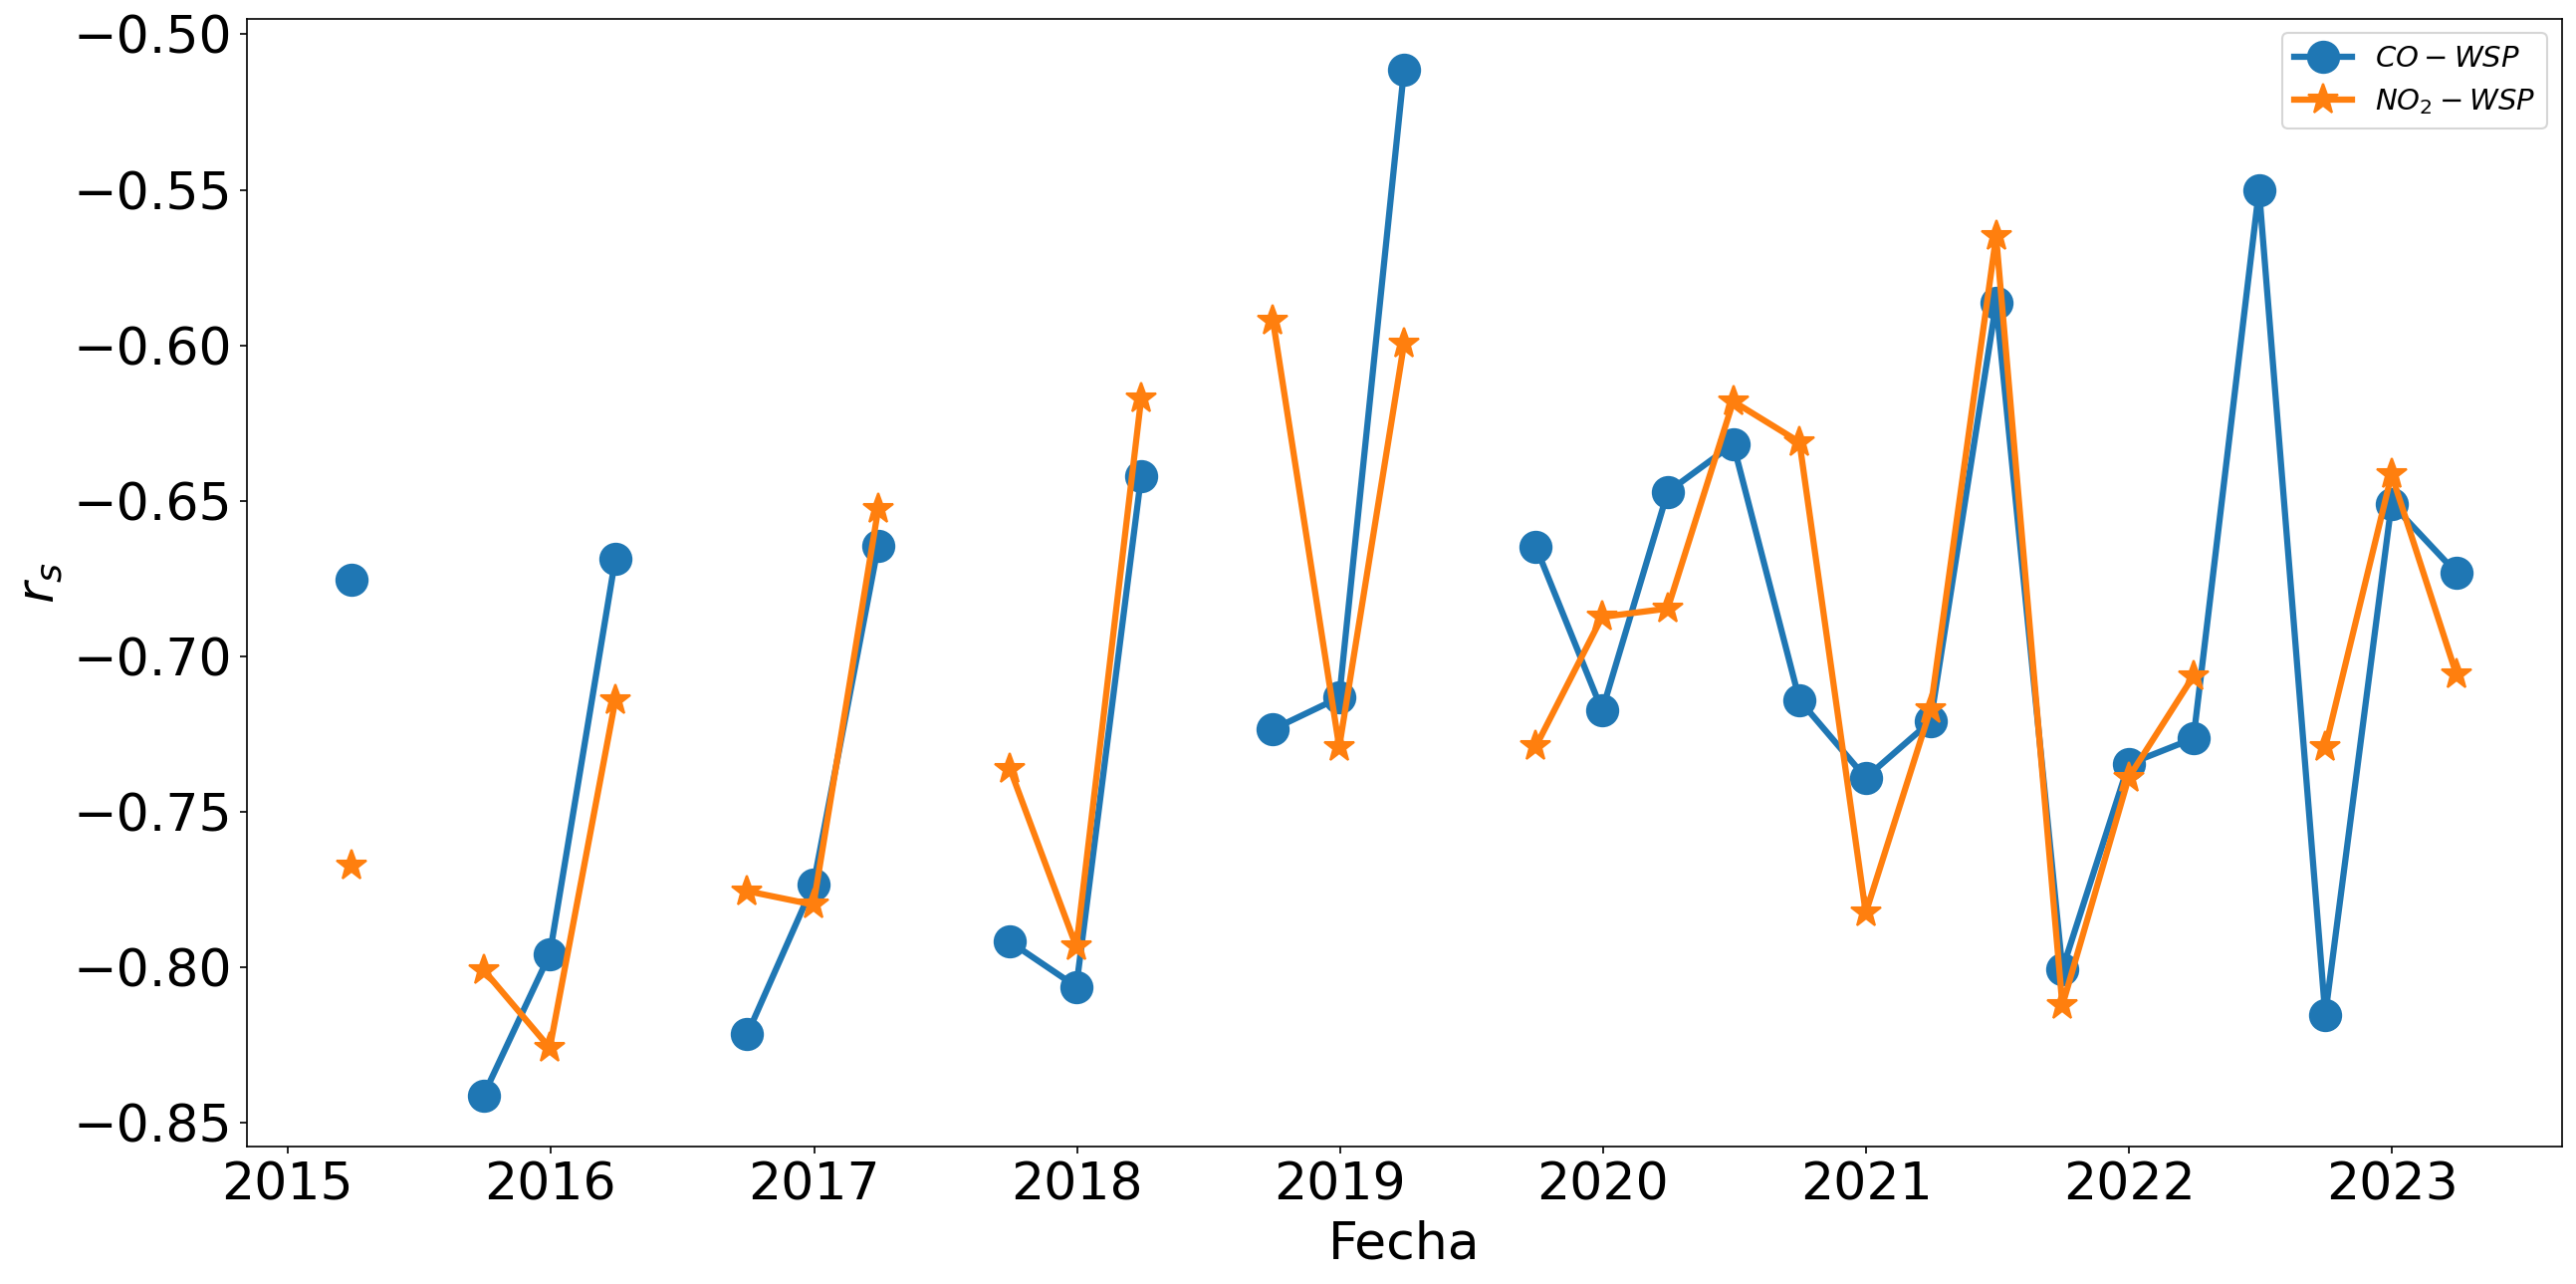

In [41]:
plt.figure(figsize=(20,10), dpi=150)
plt.plot(con_met.index, con_met['COWSP'], lw=3,label="$CO-WSP$", marker='o',ms=15)
plt.plot(con_met.index, con_met['NO2WSP'], lw=3,label="$NO_2-WSP$", marker='*',ms=15)
#plt.plot(con_met.index, con_met['RHTMP'], lw=3,label="$RH-TMP$", marker='P',ms=15)
plt.xlabel('Fecha', fontdict = {'fontsize':25 })
plt.ylabel('$r_s$',fontdict = {'fontsize':25 }) 
plt.tick_params(labelsize = 25)
plt.legend(prop={'size':14});